In [77]:
from psg import PSG
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ecg import ECG
from emg import EMG
from eeg import EEG

In [56]:
# Create PSG objects for each individual's PSG to analayze
psgN3 = PSG("n3")

Extracting EDF parameters from c:\Users\bryce\Documents\projects\psg_project\n3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


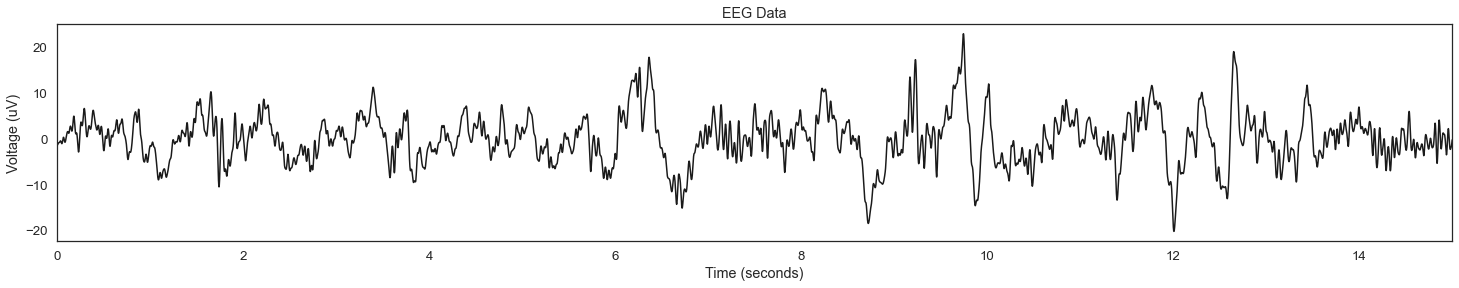

In [396]:
# Example of reading EEG Data with epoch range
EEG_N3 = EEG(psgN3.data)
vector = EEG_N3.get_eeg_vector_epoch_range(240, 251, 'F4-C4')
vector_clean = EEG_N3.preprocess(vector)
EEG_N3.plot_eeg(vector_clean[0:500*15])

Beta Relative power: 0.083
Alpha Relative power: 0.070
Theta Relative power: 0.219
Delta Relative power: 0.608


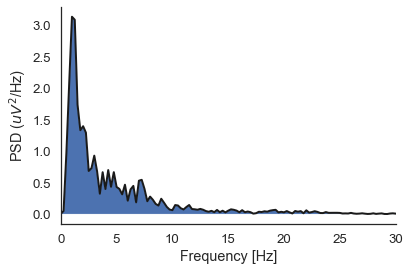

In [397]:
# Example of Welch PSD Plot & Relative Power Feature
vector = EEG_N3.get_eeg_vector_epoch(900, 'F4-C4')
vector_clean = EEG_N3.preprocess(vector)
EEG_N3.plot_welch_psd(vector_clean)
EEG_N3.relative_psd_power(vector_clean)

In [10]:
# Create ECG object:
ecgDfInput = psgN3.data.loc[400000:600000, ["epoch", "ECG1-ECG2"]]
ecgN3 = ECG(ecgDfInput)

0.875


c:\Users\bryce\AppData\Local\Programs\Python\Python310\lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
c:\Users\bryce\AppData\Local\Programs\Python\Python310\lib\si

In [11]:
# Functions for getting raw ECG data:
rawDataEpoch1 = ecgN3.getRawDataByEpoch(26)
display(rawDataEpoch1)

rawDataTime1 = ecgN3.getRawDataByTime(800, 1)
display(rawDataTime1)

# ECG Feature extraction:
metrics1 = ecgN3.getMetrics()
display(metrics1)

,epoch,ECG1-ECG2
400000,26.0,-0.000027
400001,26.0,-0.000026
400002,26.0,-0.000024
400003,26.0,-0.000021
400004,26.0,-0.000018
...,...,...
404995,26.0,0.000027
404996,26.0,0.000026
404997,26.0,0.000026
404998,26.0,0.000026


,epoch,ECG1-ECG2
400000,26.0,-0.000027
400001,26.0,-0.000026
400002,26.0,-0.000024
400003,26.0,-0.000021
400004,26.0,-0.000018
...,...,...
400496,26.0,-0.000006
400497,26.0,-0.000007
400498,26.0,-0.000009
400499,26.0,-0.000011


,epoch,bpm,rmssd,lf,hf,lf/hf
0,26,57.736429,31.302149,286.135155,190.752726,1.500032
1,27,57.645555,35.185100,253.940196,195.083700,1.301699
2,28,57.834476,33.221238,395.077250,252.723327,1.563280
3,29,57.698579,32.520601,822.889909,346.080680,2.377740
4,30,57.788945,33.272463,1209.228556,417.155969,2.898744
5,31,57.743002,33.717035,1100.210838,408.459079,2.693564


In [12]:
# Create EMG Object:
emgDfInput = psgN3.data.loc[400000:600000, ["epoch", "EMG1-EMG2"]]
emgN3 = EMG(emgDfInput)

In [13]:
# EMG Feature Extraction:
emgEnergyN3 = emgN3.emgEnergy()
print(emgEnergyN3)

epoch
26.0    1.266877e-08
27.0    4.428716e-08
28.0    4.007182e-08
29.0    3.456228e-08
30.0    4.004915e-08
31.0    3.724113e-08
32.0    4.278624e-08
33.0    3.942420e-08
34.0    3.837876e-08
35.0    2.918878e-08
36.0    2.733682e-08
37.0    2.895800e-08
38.0    2.701853e-08
39.0    6.791179e-09
40.0    0.000000e+00
Name: filtered, dtype: float64
